# NLP Basics: Reading in text data & why do we need to clean the text?

### Read in semi-structured text data

In [1]:
from google.colab import files
data_to_load = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
# Read in the raw text
rawData = open("SMSSpamCollection.tsv").read()


import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
fullCorpus  = pd.read_csv("SMSSpamCollection.tsv", sep="\t", header=None)
fullCorpus.columns=['label','body_text']

In [4]:
print ("Input data has {} rows and {} Columns".format(fullCorpus.shape[0],fullCorpus.shape[1]))

Input data has 5568 rows and 2 Columns


In [5]:
print("Out of {} rows, {} are spam, {} are ham".format(len(fullCorpus),
                                                       len(fullCorpus[fullCorpus['label']=='spam']),
                                                       len(fullCorpus[fullCorpus['label']=='ham'])))

Out of 5568 rows, 746 are spam, 4822 are ham


In [6]:
pd.set_option('display.max_colwidth', 100)

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [77]:
import string
import re
ps=nltk.PorterStemmer()
wn=nltk.WordNetLemmatizer()
stopwords=nltk.corpus.stopwords.words('english')

def clean_punct(text):
    text_clean="".join([i for i in text if i not in string.punctuation])
    return text_clean
def tocknise(text):
    return re.split("\s+",text)
def remove_stopwords(token_list):
    text=[word for word in token_list if word not in stopwords]
    return text
def stemming(token_text):
    text=[ps.stem(word) for word in token_text]
    return text
def lematizing(token_text):
    text=[wn.lemmatize(word) for word in token_text]
    return text
def word_count(text):
    chars=re.split('\W+',text)
    words=[char for char in chars if char not in string.punctuation]
    return len(words)-words.count(" ")
def body_length(text):
    return len(text)-text.count(" ")
def pun_percent(text):
    pun=[char for char in text if char in string.punctuation]
    return (round(len(pun)/len(text),3)*100)
def upper_case(text):
    chars=re.split('\W+',text)
    words=[char for char in chars if char not in string.punctuation]
    upper= [char for char in chars if char==char.upper() and len(char)>1 and not char.isdigit() ]
    return len(upper)-upper.count(" ")
def clean_text(text):
    text_removepunc="".join([char.lower() for char in text if char not in string.punctuation])
    text_removechar=re.split('\W+',text_removepunc)
    text_token=[ps.stem(char) for char in text_removechar if char not in stopwords]
    return text_token
def model_performance(model,x,y):
    pred=model.predict(x)
    print("Model Performance")
    print("--------------------------")
    print ("Accuracy:",accuracy_score(y,pred))
    print ("precision:", precision_score(y,pred))
    print ("Recall:",recall_score(y,pred))
    print ("F1 Score:",f1_score(y,pred))
def model_performance_scores(model,x,y):
    pred=model.predict(x)
    return accuracy_score(y,pred), precision_score(y,pred),recall_score(y,pred),f1_score(y,pred)
def display_AUC_ROC():
    print('Area Under ROC')
    print('---------------')
    print('LogisticRegression:',roc_auc_score(y_train, y_logitint_scores).round(3))
    print('DecisionTree:',roc_auc_score(y_train, y_dt_scores).round(3))
    print('RandomForest:',roc_auc_score(y_train, y_rf_scores).round(3))
    print('XGBoost:',roc_auc_score(y_train, y_xgb_scores).round(3))
    print('SDG classifier:',roc_auc_score(y_train, y_sgdc_scores).round(3))
    plt.figure(figsize=(8,6))
    plt.plot(fpr_logit,tpr_logit,label="Logistic regression")
    plt.plot(fpr_dt,tpr_dt,label="Decisiontree")
    plt.plot(fpr_rf,tpr_rf,label="Random Forest")
    plt.plot(fpr_xgb,tpr_xgb,label="Ex-Gradient Boosting")
    plt.plot(fpr_sgdc,tpr_sgdc,label="SDG Classifier")
    plt.plot([0, 1], [0, 1], 'k--'),plt.axis([0, 1, 0, 1.1])
    plt.xlabel('False Positive Rate') ,plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right'),plt.title('Recieve operator curve')

In [8]:
data['body_text_clean']=data['body_text'].apply(lambda x: clean_punct(x))
data['body_text_tokanized']=data['body_text_clean'].apply(lambda x: tocknise(x.lower()))
data['body_text_nostop']=data['body_text_tokanized'].apply(lambda x: remove_stopwords(x))
data['body_text_stemmed']=data['body_text_nostop'].apply(lambda x:stemming(x) )
data['body_text_lemmatized']=data['body_text_nostop'].apply(lambda x:lematizing(x) )

In [9]:
data

,label,body_text,body_text_clean,body_text_tokanized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"
...,...,...,...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,This is the 2nd time we have tried 2 contact u U have won the £750 Pound prize 2 claim is easy c...,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, £750, pound, prize...","[2nd, time, tried, 2, contact, u, u, £750, pound, prize, 2, claim, easy, call, 087187272008, now...","[2nd, time, tri, 2, contact, u, u, £750, pound, prize, 2, claim, easi, call, 087187272008, now1,...","[2nd, time, tried, 2, contact, u, u, £750, pound, prize, 2, claim, easy, call, 087187272008, now..."
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanad, fr, home]","[ü, b, going, esplanade, fr, home]"
5565,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,"[pity, was, in, mood, for, that, soany, other, suggestions]","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]"
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,The guy did some bitching but I acted like id be interested in buying something else next week a...,"[the, guy, did, some, bitching, but, i, acted, like, id, be, interested, in, buying, something, ...","[guy, bitching, acted, like, id, interested, buying, something, else, next, week, gave, us, free]","[guy, bitch, act, like, id, interest, buy, someth, els, next, week, gave, us, free]","[guy, bitching, acted, like, id,

## Feature Engineering

In [10]:
data1 = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data1.columns = ['label', 'body_text']
data1['body_len'] = data1['body_text'].apply(lambda x: len(x) - x.count(" "))


In [11]:
def percentage_puncuation(text):
    count=[char for char in text if char in string.punctuation]
    return round(len(count)/(len(text)-text.count(" ")),3)*100
    

In [12]:
data1['pun_percen'] = data1['body_text'].apply(lambda x: percentage_puncuation(x))


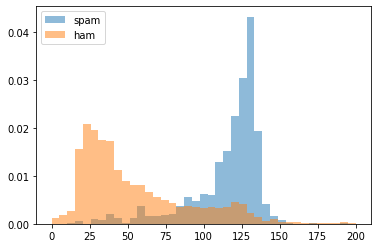

In [13]:
#Evaluare 
from matplotlib import pyplot
import numpy as np 
%matplotlib inline 

bins=np.linspace(0,200,40)
pyplot.hist(data1[data1['label']=='spam']['body_len'], bins, alpha=0.5, density =True, label='spam')
pyplot.hist(data1[data1['label']=='ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')

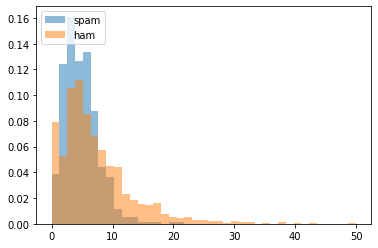

In [14]:
bins=np.linspace(0,50,40)
pyplot.hist(data1[data1['label']=='spam']['pun_percen'], bins, alpha=0.5, density =True, label='spam')
pyplot.hist(data1[data1['label']=='ham']['pun_percen'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')

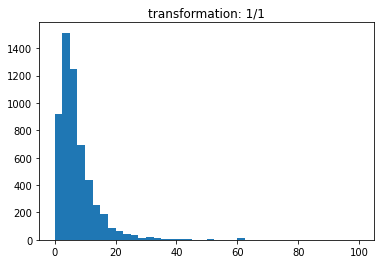

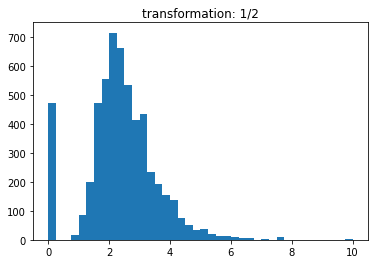

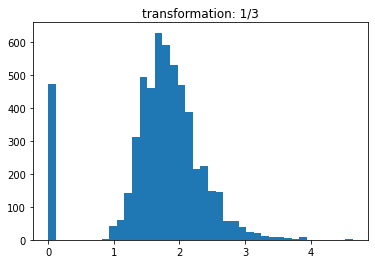

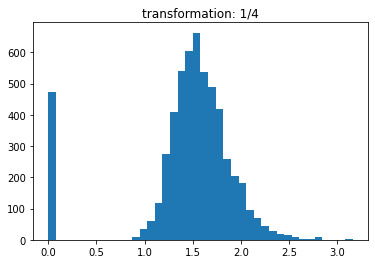

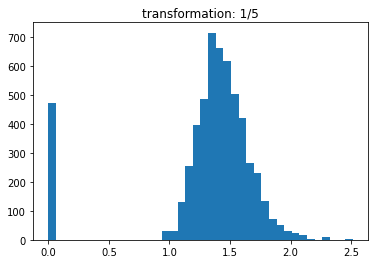

In [15]:
#transformation
for i in range(1,6):
    pyplot.hist(data1['pun_percen']**(1/i),bins=40)
    pyplot.title("transformation: 1/{}".format(str(i)))
    pyplot.show()

In [58]:
#Preparng data for modeling
pd.set_option('display.max_colwidth', 100)

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
data.columns=['label','body_text']

data['word_count']= data['body_text'].apply(lambda x: word_count(x))
data['punct%']= data['body_text'].apply(lambda x: pun_percent(x))
data['body_length']= data['body_text'].apply(lambda x: body_length(x))
data['upper_case']= data['body_text'].apply(lambda x: upper_case(x))

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#Tfidf
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(data['body_text'])
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df=pd.concat([data['word_count'],data['punct%'],data['body_length'],data['upper_case'],X_tfidf_df],axis=1)
data.loc[data['label'] =='spam'] = 1
data.loc[data['label'] =='ham'] = 0
data['label']=data['label'].astype('int')

In [59]:
#building models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_val_predict
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test= train_test_split(X_tfidf_df,data['label'],test_size=0.2)

In [60]:
'''Do Not RUN'''
#logistic Regression
log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)
logistic_train_scores=list(model_performance_scores(log_reg,X_train,y_train))
logistic_test_scores=list(model_performance_scores(log_reg,X_test,y_test))
y_logitint_predict_prob=log_reg.predict_proba(X_train)
y_logitint_scores=y_logitint_predict_prob[:,1]
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_train, y_logitint_scores)


#Decesion Tree
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
dt_train_scores=list(model_performance_scores(dt,X_train,y_train))
dt_test_scores=list(model_performance_scores(dt,X_test,y_test))
y_dt_predict_prob=dt.predict_proba(X_train)
y_dt_scores=y_dt_predict_prob[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_dt_scores)


#Random Forest
rf = RandomForestClassifier(n_estimators=65, max_depth=59, n_jobs=-1)
rf.fit(X_train,y_train)
rf_test_scores=list(model_performance_scores(rf,X_test,y_test))
y_random_predict_prob=rf.predict_proba(X_train)
y_rf_scores=y_random_predict_prob[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_rf_scores)

#sgd classifier
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
sgdc.fit(X_train,y_train)
sgdc_train_scores=list(model_performance_scores(sgdc,X_train,y_train))
sgdc_test_scores=list(model_performance_scores(sgdc,X_test,y_test))
y_sgdc_predict_prob=dt.predict_proba(X_train)
y_sgdc_scores=y_dt_predict_prob[:,1]
fpr_sgdc, tpr_sgdc, thresholds_sgdc = roc_curve(y_train, y_sgdc_scores)


#XGboost
XGB_model = XGBClassifier(silent=False, 
                      learning_rate=0.1,  
                      objective='binary:logistic', 
                      n_estimators=65, 
                      max_depth=60, 
                    )
XGB_model.fit(X_train,y_train)
xgb_train_scores=list(model_performance_scores(XGB_model,X_train,y_train))
xgb_test_scores=list(model_performance_scores(XGB_model,X_test,y_test))
y_xgb_predict_prob=XGB_model.predict_proba(X_train)
y_xgb_scores=y_xgb_predict_prob[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, y_xgb_scores)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
scores=pd.DataFrame([logistic_test_scores,
                   dt_test_scores,rf_test_scores,
                    xgb_test_scores,sgdc_test_scores])
scores.columns=['Accuracy','Precision','Recall','F1 Score']
scores.index=['logistic_test',
              'DecisionTree_test',
              'RandomForest_test',
               'XGB_Test','SDG_Test']
scores

,Accuracy,Precision,Recall,F1 Score
logistic_test,0.967684,0.955752,0.776978,0.857143
DecisionTree_test,0.947038,0.817460,0.741007,0.777358
RandomForest_test,0.980251,1.000000,0.841727,0.914062
XGB_Test,0.981149,0.975806,0.870504,0.920152
SDG_Test,0.885099,0.739130,0.122302,0.209877


Area Under ROC
---------------
LogisticRegression: 0.994
DecisionTree: 0.922
RandomForest: 1.0
XGBoost: 1.0
SDG classifier: 0.922


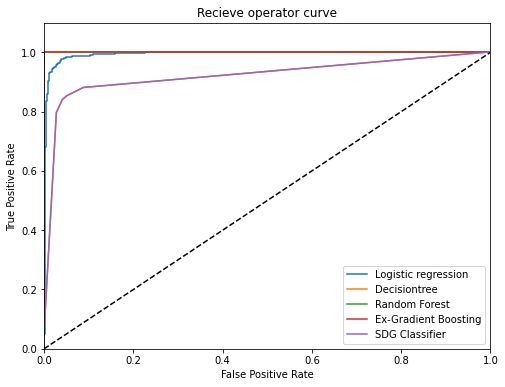

In [84]:
display_AUC_ROC()

In [ ]:
#NOT REQUIRED FROM BELOW

In [23]:
rf=RandomForestClassifier(n_estimators=65, max_depth=59, n_jobs=-1)
rf_model=rf.fit(X_train,y_train)

In [24]:
#Feature importance
sorted(zip(rf_model.feature_importances_,X_test.columns),reverse=True)[0:15]

[(0.055685735176885694, 'upper_case'),
 (0.0501590366513494, 'body_length'),
 (0.03679527395567273, 'call'),
 (0.02456577891935761, 'txt'),
 (0.01944279646102185, 'word_count'),
 (0.01893130615424388, 'prize'),
 (0.017635333470036717, 'servic'),
 (0.015880371380937404, 'mobil'),
 (0.015302124707260854, 'free'),
 (0.013700413501392414, 'claim'),
 (0.013168130229057537, 'stop'),
 (0.011800777378519044, 'repli'),
 (0.01071101846450334, 'new'),
 (0.009734624088349346, 'text'),
 (0.009497289308392678, 'urgent')]